In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Load dataset

In [3]:
data = pd.read_excel('data/DDS9_Data_Extract_with_labels.xlsx')
# df2 = pd.read_excel('Deloitte_Digital_Democracy_data/DDS10_Data_Extract_with_labels.xlsx')
# df3 = pd.read_excel('Deloitte_Digital_Democracy_data/DDS11_Data_Extract_with_labels.xlsx')
# data = pd.concat([df1, df2, df3])

### Select columns

In [4]:
target_column = 'QNEW24 - Do you ever "binge-watch" television shows, meaning watching three or more episodes of a TV series in one sitting?'

relevant_features = ['Q1r1 - To begin, what is your age?',
                     'Q4 - What is your gender?',
                     'QNEW3 - What is your employment status?',
                     'Q5 - Which category best describes your ethnicity?']

model_data = data[relevant_features + [target_column]].dropna()

### Preprocess data

In [5]:
label_encoder = LabelEncoder()
for column in model_data.select_dtypes(include=['object']).columns:
    model_data[column] = label_encoder.fit_transform(model_data[column])

X = model_data[relevant_features]
y = label_encoder.fit_transform(model_data[target_column])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train model

In [6]:
model = RandomForestClassifier(random_state=15)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=15)

### Evaluate model

In [7]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Accuracy: 0.6468699839486356
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.42      0.44       207
           1       0.72      0.76      0.74       416

    accuracy                           0.65       623
   macro avg       0.60      0.59      0.59       623
weighted avg       0.64      0.65      0.64       623

Feature Importances:
                                              Feature  Importance
0                 Q1r1 - To begin, what is your age?    0.716731
3  Q5 - Which category best describes your ethnic...    0.137349
2            QNEW3 - What is your employment status?    0.095562
1                          Q4 - What is your gender?    0.050357


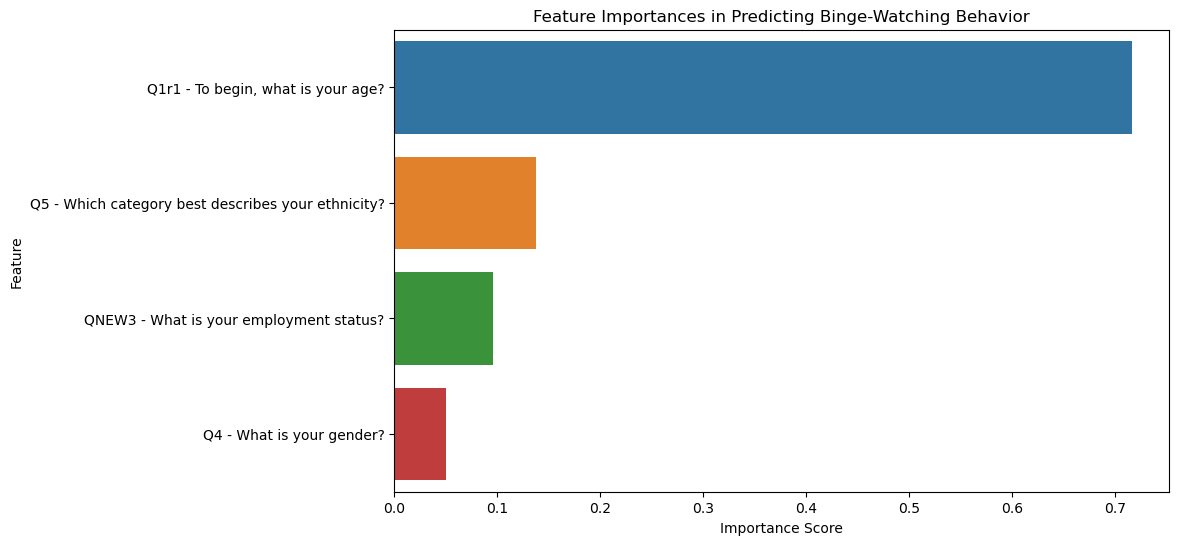

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Predicting Binge-Watching Behavior')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


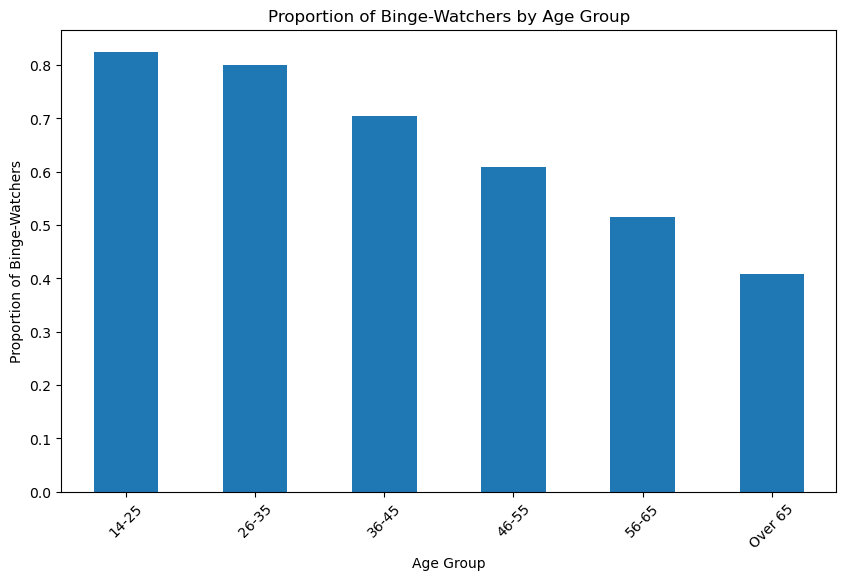

In [9]:
# Define the age groups
def categorize_age(age):
    if age < 14:
        return "Under 14"
    elif 14 <= age <= 25:
        return "14-25"
    elif 26 <= age <= 35:
        return "26-35"
    elif 36 <= age <= 45:
        return "36-45"
    elif 46 <= age <= 55:
        return "46-55"
    elif 56 <= age <= 65:
        return "56-65"
    else:
        return "Over 65"

# Apply categorization
data['Age Group'] = data['Q1r1 - To begin, what is your age?'].apply(categorize_age)

# Convert 'Yes'/'No' to binary
binge_watch_column = 'QNEW24 - Do you ever "binge-watch" television shows, meaning watching three or more episodes of a TV series in one sitting?'
data[binge_watch_column] = data[binge_watch_column].map({'Yes': 1, 'No': 0})

# Group by age group and calculate proportion
age_group_binge_group = data.groupby('Age Group')[binge_watch_column].mean()

# Plotting
plt.figure(figsize=(10, 6))
age_group_binge_group.plot(kind='bar')
plt.title('Proportion of Binge-Watchers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Binge-Watchers')
plt.xticks(rotation=45)
plt.show()
